### MNIST Classifier

In this notebook, we will implement a CNN classifier to classify all the 10 digits the MNIST dataset. The objective of this lesson is twofold:
* To build our first CNN classifier.
* To use cross-entropy as classification loss.

Let's start with the ususal imports.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

2024-07-16 20:41:47.027097: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-16 20:41:47.032360: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-16 20:41:47.088393: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-16 20:41:47.189715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 20:41:47.290130: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

#### Dataset Loading

We have already inspected the MNIST dataset. We are going to load it now since we are going to use it for training the classifier.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


#### Building the Classifier

We are going to build the same CNN classifier as before but note that we are using the softmax activation in the last layer (classification head).

In [3]:
inputs = Input(shape=(size, size, 1))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,810 (50.04 KB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 0 (0.00 B)

#### Training

Let's now compile and train the model. We will use the cross-entropy loss for this task. And note that we can use the built-in accuracy metric for monitoring the training.

In [4]:
epochs = 25
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7841 - loss: 0.7772 - val_accuracy: 0.9707 - val_loss: 0.1113
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9665 - loss: 0.1154 - val_accuracy: 0.9778 - val_loss: 0.0773
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9766 - loss: 0.0796 - val_accuracy: 0.9802 - val_loss: 0.0640
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9812 - loss: 0.0634 - val_accuracy: 0.9838 - val_loss: 0.0562
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9832 - loss: 0.0538 - val_accuracy: 0.9858 - val_loss: 0.0509
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9852 - loss: 0.0467 - val_accuracy: 0.9870 - val_loss: 0.0475
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9873 - loss: 0.0410 - val_accuracy: 0.9880 - val_loss: 0.0446
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 0.

Let's now plot the history to see the evolution of the training.

Train Acc      0.9976666569709778
Validation Acc 0.9891666769981384


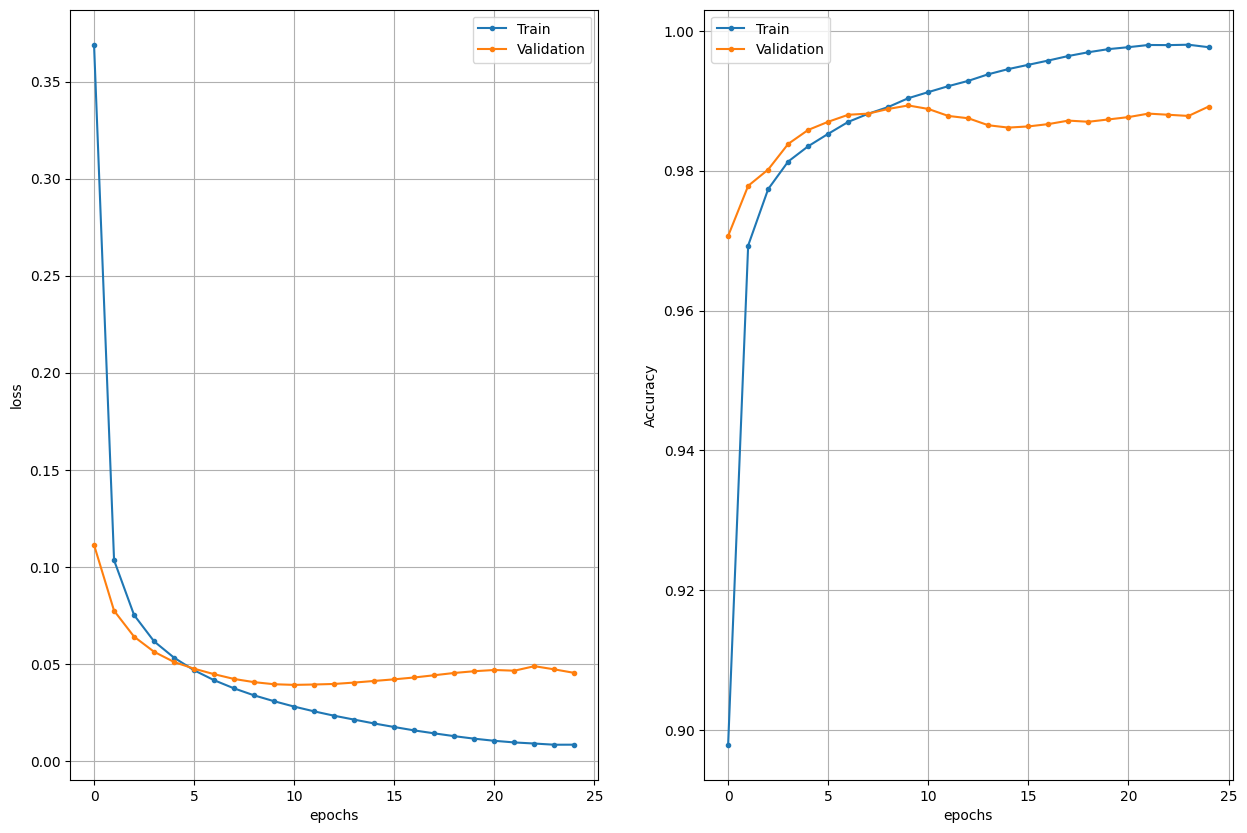

In [5]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

We have obtained an overall accuracy of about 99%. This might seem lower than we obtained using the binary classifier before but remember we are now classifying **all 10 digits**.

In [6]:
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
True [7 2 1 0 4]
Pred [7 2 1 0 4]
Pred [[1.64593060e-16 3.71265627e-13 3.84975074e-09 1.00870333e-10
  2.34574770e-22 7.12028601e-15 2.50419556e-25 1.00000000e+00
  1.35877247e-11 6.32520425e-10]
 [2.42002460e-11 4.70055245e-11 1.00000000e+00 6.93679379e-16
  7.97183218e-19 1.73913544e-20 1.43135601e-10 2.44708925e-19
  5.11770626e-10 4.78297213e-18]
 [6.30866331e-11 9.99962807e-01 4.57594496e-09 1.20080265e-11
  3.22638480e-05 2.12562565e-10 9.87878668e-10 8.13623103e-07
  4.08529240e-06 5.90883920e-09]
 [1.00000000e+00 2.90233508e-19 1.95476427e-10 1.12651067e-16
  2.25516576e-14 6.99362036e-14 9.96376093e-10 3.63759180e-13
  1.94342003e-12 1.83536649e-12]
 [1.33061372e-16 4.13685862e-16 3.28760727e-13 2.26549761e-16
  1.00000000e+00 7.11288731e-19 1.91172605e-15 3.86169525e-12
  4.44539457e-12 6.85967683e-09]]
(10000, 10)


In [7]:
digits = range(0, 10)
y_pred = np.argmax(y_pred, axis=1)

for digit in digits:
    mask = y_true == digit
    
    tp = np.sum(y_pred[mask] == digit)
    total = np.sum(mask)
    
    print('Digit-', digit, ' acc', tp/total)
    
print('y_true', y_true[mask])
print('y_pred', y_pred[mask])

Digit- 0  acc 0.9959183673469387
Digit- 1  acc 0.9929515418502203
Digit- 2  acc 0.9874031007751938
Digit- 3  acc 0.995049504950495
Digit- 4  acc 0.994908350305499
Digit- 5  acc 0.9831838565022422
Digit- 6  acc 0.9853862212943633
Digit- 7  acc 0.9883268482490273
Digit- 8  acc 0.9897330595482546
Digit- 9  acc 0.9712586719524281
y_true [9 9 9 ... 9 9 9]
y_pred [9 9 9 ... 9 9 9]


The trained model can also be quickly evaluated by calling the evaluate method on the test data. It will return the loss and the metric (or metrics).

In [8]:
ev = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.9851 - loss: 0.0652


In [9]:
print('Test loss  ', ev[0])
print('Test metric', ev[1])

Test loss   0.05130012333393097
Test metric 0.9884999990463257


We now visualise some of the evaluation results.

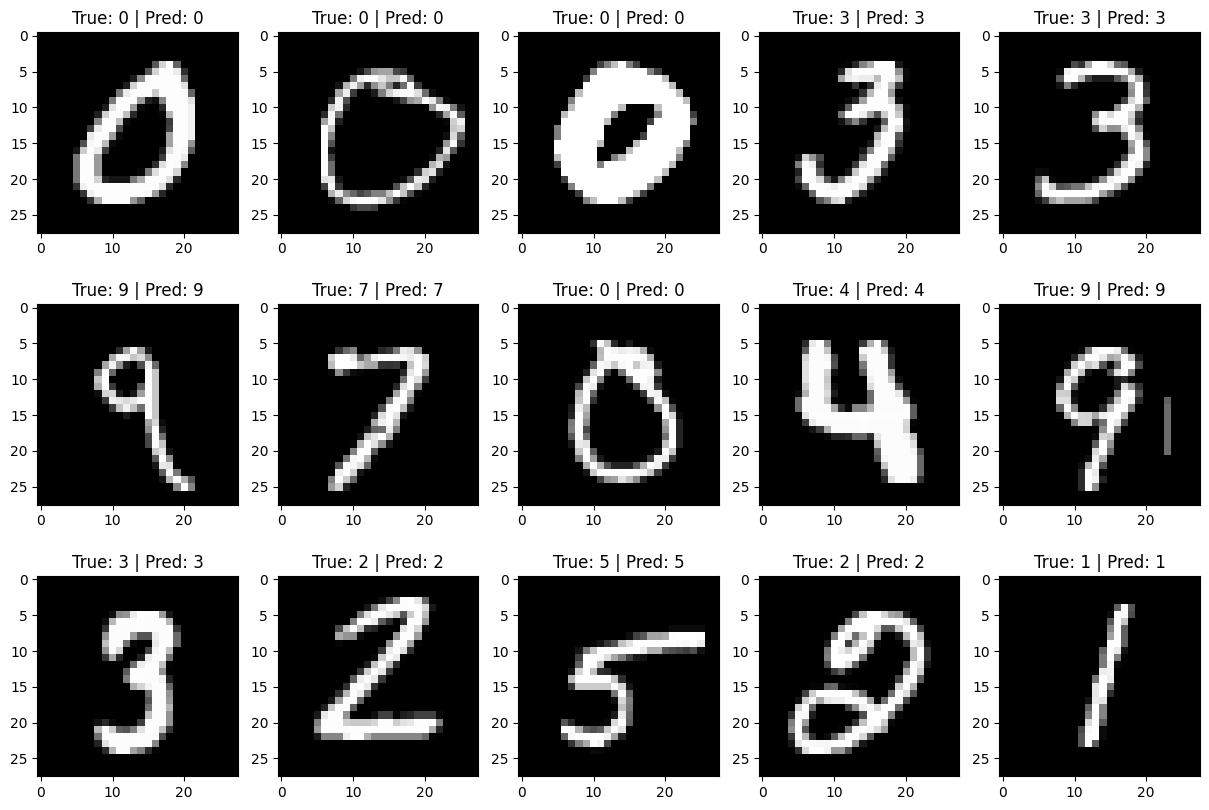

In [10]:
for ii in range(15):
    idx = np.random.randint(0, len(y_pred))
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...], cmap='gray')
    plt.title('True: ' + str(y_true[idx]) + ' | Pred: ' + str(y_pred[idx]))